In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"


In [1]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data)
# Display the data table for preview
city_data.head()


NameError: name 'pd' is not defined

In [3]:
# Read the City and Ride Data
ride_data = pd.read_csv(ride_data)
# Display the data table for preview
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
full_data = pd.merge(city_data, ride_data, how='outer')
full_data_df = full_data.drop_duplicates('ride_id')

# Display the data table for preview
full_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
urban_df = full_data_df.loc[full_data_df["type"] == "Urban", :]
suburban_df = full_data_df.loc[full_data_df["type"] == "Suburban", :]
rural_df = full_data_df.loc[full_data_df["type"] == "Rural", :]

#Groups our three new datasets by city
bycity_urban_df = urban_df.groupby(['city'])
bycity_suburban_df = suburban_df.groupby(['city'])
bycity_rural_df = rural_df.groupby(['city'])

#CITYtype
city_type = full_data_df.groupby("city")["type"]
city_type.value_counts()

city                  type    
Amandaburgh           Urban       18
Barajasview           Urban       22
Barronchester         Suburban    16
Bethanyland           Suburban    18
Bradshawfurt          Rural       10
Brandonfort           Suburban    19
Carriemouth           Urban       27
Christopherfurt       Urban       27
Colemanland           Suburban    22
Davidfurt             Suburban    17
Deanville             Urban       19
East Aaronbury        Suburban     9
East Danielview       Suburban    17
East Kaylahaven       Urban       29
East Kentstad         Suburban    13
East Marymouth        Suburban    27
Erikaland             Urban       12
Garzaport             Rural        3
Grahamburgh           Urban       25
Grayville             Suburban    15
Harringtonfort        Rural        6
Huntermouth           Urban       24
Hurleymouth           Urban       28
Jerryton              Urban       25
Jessicaport           Rural        6
Johnton               Urban       21
Jonesch

In [6]:
averagecity_fare = full_data_df.groupby("city")["fare"].mean()
averagecity_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [7]:
tcity_rides = full_data_df.groupby("city")["ride_id"].count()
tcity_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [8]:
tdrivers = full_data_df.groupby("city")["driver_count"].mean()
tdrivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [14]:
urbanCities=full_data_df[full_data_df["type"]=="Urban"]
suburbanCities=full_data_df[full_data_df["type"]=="Suburban"]
ruralCities=full_data_df[full_data_df["type"]=="Rural"]

In [15]:

#use previous variables for averages and totals

urbanRideCount=urban_df.groupby(["city"]).count()["ride_id"]
urbanFareAvg=urban_df.groupby(["city"]).mean()["fare"]
urbanDriverCount=urban_df.groupby(["city"]).mean()["driver_count"]

suburbanRideCount=suburban_df.groupby(["city"]).count()["ride_id"]
suburbanFareAvg=suburban_df.groupby(["city"]).mean()["fare"]
suburbanDriverCount=suburban_df.groupby(["city"]).mean()["driver_count"]

ruralRideCount=rural_df.groupby(["city"]).count()["ride_id"]
ruralFareAvg=rural_df.groupby(["city"]).mean()["fare"]
ruralDriverCount=rural_df.groupby(["city"]).mean()["driver_count"]

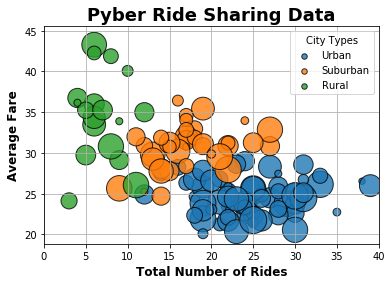

In [52]:
plt.scatter(urbanRideCount, 
            urbanFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.scatter(suburbanRideCount, 
            suburbanFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban")

plt.scatter(ruralRideCount, 
            ruralFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Rural")

plt.title("Pyber Ride Sharing Data", fontsize= 18,fontweight = 800)
plt.ylabel("Average Fare",fontsize= 12, fontweight = 800)
plt.xlabel("Total Number of Rides",fontsize= 12,fontweight = 800)
plt.xlim((0,40))
plt.grid(True)


lgnd = plt.legend(fontsize="medium", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()

In [20]:
# Calculate CityType Percents
city_fare_pie = full_data_df.groupby(["type"])["fare"].sum()
city_fare_pie


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [21]:
city_fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

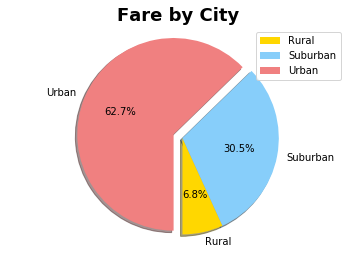

In [39]:
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.

explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")
plt.title("Fare by City", fontsize= 18,fontweight = 800)
#Show the chart.
plt.show()

In [23]:
##Total Rides by City Type Pie chart
city_rides_pie =full_data_df.groupby(["type"])["ride_id"].count()
city_rides_pie


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [24]:
city_rides_pie.index


Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

In [2]:
colors = ["gold", "blue", "red"]

#Only explode the third section of the pie chart.

explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_rides_pie, labels = city_rides_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")
plt.title("Rides by City", fontsize= 18,fontweight = 800)
#Show the chart.
plt.show()

NameError: name 'plt' is not defined

In [26]:
#driver count or Ride id?
city_driver_pie = city_data.groupby(["type"])["driver_count"].sum()    
city_driver_pie

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [27]:
city_driver_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

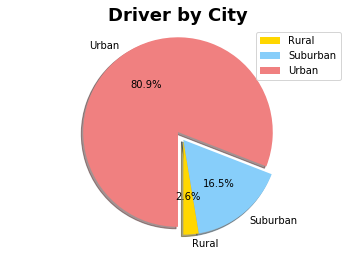

In [37]:
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.

explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_driver_pie, labels = city_driver_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")
plt.title("Driver by City", fontsize =18, fontweight = 800)
#Show the chart.
plt.show()